In [9]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('datasets/Ads_CTR_Optimisation.csv')


## Random Selection Algorithm

In [ ]:
# Implementing random selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

# Visualizing the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## UCB algorithm

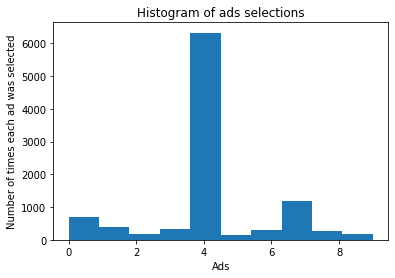

In [13]:
# Implementing UCB algorithm
import math
N = 10000
d = 10

numbers_of_selections = [0 for i in range(d)]
sums_of_rewards = [0 for i in range(d)]
ads_selected = []
total_reward = 0
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            avg_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

# Visualizing the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
